# mOWL: Python library for machine learning with ontologies

------------------------------------
mOWL is a Python library designed to standardize machine learning models that use ontologies as main data source.
To get familiar with the models implemented in mOWL and more information about the library we recommend the following documents:
- [Semantic similarity and machine learning with ontologies](https://academic.oup.com/bib/article/22/4/bbaa199/5922325)
- [mOWL: Python library for machine learning with biomedical ontologies](https://academic.oup.com/bioinformatics/article/39/1/btac811/6935780?login=true)
- [mOWL documentation](https://mowl.readthedocs.io/en/latest/index.html)

The topics we cover in this tutorial are:
- mOWL intallation
- Creation of an simple ontology: Family Domain
- Graph-based embeddinrandomng random walks

## mOWL installation:

mOWL is available on the [PyPi repository](https://pypi.org/project/mowl-borg/) and the source code is available on [Github](https://github.com/bio-ontology-research-group/mowl). For this tutorial we will install mOWL from PyPi using the following command:

In [1]:
!apt install python3-sklearn python3-sklearn-lib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-lyx libimagequant0 liblbfgsb0 libraqm0 libxsimd-dev mailcap mime-support
  python-matplotlib-data python3-appdirs python3-attr python3-beniget python3-brotli python3-bs4
  python3-chardet python3-cycler python3-dateutil python3-decorator python3-fonttools python3-fs
  python3-gast python3-html5lib python3-iniconfig python3-joblib python3-kiwisolver python3-lxml
  python3-lz4 python3-matplotlib python3-mpmath python3-nose python3-numpy python3-olefile
  python3-packaging python3-pil python3-pil.imagetk python3-pluggy python3-ply python3-psutil
  python3-py python3-pygments python3-pytest python3-pythran python3-scipy python3-simplejson
  python3-soupsieve python3-sympy python3-threadpoolctl python3-toml python3-tz python3-ufolib2
  python3-unicodedata2 python3-webencodings unicode-data
Suggested packages:
  libxsi

In [2]:
#mOWL installation
!pip install mowl-borg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 31.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for temp: filename=temp-2020.7.2-py3-none-any.whl size=1230 sha256=f9ab9e6c398b515333d52e7e23646e754c16defff74872eef44f9f0c0a24547d
  Stored in directory: /root/.cache/pip/wheels/54/f4/e0/66146

## Import mOWL

mOWL interfaces the OWL API. For this, we need to interface with the Java Virtual Machine (JVM). A common problem arises if Java is not installed in your working machine.

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/1st Team Lecture/")
'''

In [3]:
#import mOWL
import mowl
mowl.init_jvm("10g")

In [4]:
!java --version
!python --version

openjdk 11.0.21 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
Python 3.10.12


In [5]:
import os
from java.util import HashSet
from mowl.owlapi import OWLAPIAdapter
from org.semanticweb.owlapi.model import IRI

# Family domain ontology

Let's create the first ontology

In [6]:
#Family domain ontology creation
adapter = OWLAPIAdapter()
ontology = adapter.create_ontology("http://mowl/family")

## Concept names

To create a concept, we use the function `adapter.create_class(concept_iri)`

In [7]:
#Concept names
male     = adapter.create_class("http://Male")
female   = adapter.create_class("http://Female")
parent   = adapter.create_class("http://Parent")
person   = adapter.create_class("http://Person")
mother   = adapter.create_class("http://Mother")
father   = adapter.create_class("http://Father")
sibling  = adapter.create_class("http://Sibling")
brother  = adapter.create_class("http://Brother")
sister   = adapter.create_class("http://Sister")
son      = adapter.create_class("http://Son")
daughter = adapter.create_class("http://Daughter")

## Object property/Role names

To create an object_property, we use the function `adapter.create_object_property(object_property_iri)`

In [8]:
#Object property
has_child = adapter.create_object_property("http://hasChild")
has_parent = adapter.create_object_property("http://hasParent")

## Individual names

To create an individual, we use the function `adapter.create_individual(individual_iri)`

In [9]:
#Individual names
John = adapter.create_individual("http://John")
Jane = adapter.create_individual("http://Jane")
Robert = adapter.create_individual("http://Robert")
Melissa = adapter.create_individual("http://Melissa")

## Axioms
Axioms of the form $A \sqsubseteq B$.

In [10]:
#Axioms of the form A⊑B
axioms = HashSet()
axioms.add(adapter.create_subclass_of(male, person))
axioms.add(adapter.create_subclass_of(female, person))
axioms.add(adapter.create_subclass_of(parent, person))
axioms.add(adapter.create_subclass_of(mother, female))
axioms.add(adapter.create_subclass_of(father, male))

True

Axioms of the form $A \sqcap B \sqsubseteq C$.

In [11]:
#Axioms of the form  A⊓B⊑C

#Intersections
parent_and_male = adapter.create_object_intersection_of(parent, male)
parent_and_female = adapter.create_object_intersection_of(parent, female)

#Subclass axioms
axioms.add(adapter.create_subclass_of(parent_and_male, father))
axioms.add(adapter.create_subclass_of(parent_and_female, mother))

True

Axioms of the form $A \sqcup B \equiv C$.

In [12]:
#Axioms of the form  A⊔B≡C
male_or_female = adapter.create_object_union_of(male, female)
axioms.add(adapter.create_equivalent_classes(male_or_female, person))

True

Axiom of the form $\neg A \equiv  B$.

In [18]:
#One axiom of the form  ¬A≡B
not_male = adapter.create_complement_of(male)
axioms.add(adapter.create_equivalent_classes(not_male, female))

False

One axiom of the form $A \sqsubseteq \exists R.B$.

In [17]:
#One axiom of the form  A⊑∃R.B
has_child_person = adapter.create_object_some_values_from(has_child, person)
axioms.add(adapter.create_subclass_of(parent, has_child_person))

True

Assertion axioms of the form $C(a)$ and $R(a,b)$.

In [19]:
#Assertion axioms of the form  C(a)  and  R(a,b)
axioms.add(adapter.create_class_assertion(father, John))
axioms.add(adapter.create_class_assertion(mother, Jane))
axioms.add(adapter.create_class_assertion(male, Robert))
axioms.add(adapter.create_class_assertion(female, Melissa))
axioms.add(adapter.create_object_property_assertion(has_child, John, Robert))
axioms.add(adapter.create_object_property_assertion(has_child, Jane, Robert))
axioms.add(adapter.create_object_property_assertion(has_child, John, Melissa))
axioms.add(adapter.create_object_property_assertion(has_child, Jane, Melissa))
adapter.owl_manager.addAxioms(ontology, axioms)

<java object 'org.semanticweb.owlapi.model.parameters.ChangeApplied'>

In [20]:
ont_file = os.path.abspath(f'family.owl')

In [ ]:
"""#this
file_uri=IRI.create("file:///"+ont_file.replace("\\","/"))
adapter.owl_manager.saveOntology(ontology, file_uri)
"""

In [21]:
#or that
adapter.owl_manager.saveOntology(ontology, IRI.create('file:///'+ont_file.replace("\\","/")))


In [22]:
print(ontology)

Ontology(OntologyID(OntologyIRI(<http://mowl/family>) VersionIRI(<null>))) [Axioms: 18 Logical Axioms: 18] First 20 axioms: {SubClassOf(<http://Male> <http://Person>) SubClassOf(<http://Parent> ObjectSomeValuesFrom(<http://hasChild> <http://Person>)) SubClassOf(<http://Parent> <http://Person>) SubClassOf(<http://Father> <http://Male>) SubClassOf(ObjectIntersectionOf(<http://Female> <http://Parent>) <http://Mother>) SubClassOf(ObjectIntersectionOf(<http://Male> <http://Parent>) <http://Father>) SubClassOf(<http://Mother> <http://Female>) SubClassOf(<http://Female> <http://Person>) ObjectPropertyAssertion(<http://hasChild> <http://Jane> <http://Melissa>) ObjectPropertyAssertion(<http://hasChild> <http://Jane> <http://Robert>) ObjectPropertyAssertion(<http://hasChild> <http://John> <http://Melissa>) ObjectPropertyAssertion(<http://hasChild> <http://John> <http://Robert>) ClassAssertion(<http://Female> <http://Melissa>) ClassAssertion(<http://Father> <http://John>) ClassAssertion(<http://M

# Ontology projections into graphs
## Graph-based embeddings


Ontologies are formed by a TBox, an ABox and an RBox. A Knowledge
Graph can be easily extracted from the ABox and the RBox. However, to
encode the graph representation of the TBox, which is composed by
(complex) concept descriptions, many approaches have been developed. In mOWL, we provide some
methods that perform ontology projection into graphs:

- **Taxonomy projection**: the projection of axioms of the form $A
\sqsubseteq B$ as edges $(A, subclassof, B)$.

- **Taxonomy + relations**: the projection of axioms of the form $A
\sqsubseteq B$ and $A \sqsubseteq \exists R.B$ as edges $(A,
subclassof, B)$ and $(A, R, B)$, respectively.

- **DL2Vec projection**

- **OWL2Vec projection**

In [23]:
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector

INFO:pykeen.utils:Using opt_einsum


In [ ]:
"""from mowl.datasets.builtin import FamilyDataset
from mowl.datasets import PathDataset
dataset = FamilyDataset()
#dataset = PathDataset(os.path.abspath("family.owl"))
"""

## Taxonomy projector (Hierarchy only)

In [24]:
edges = TaxonomyProjector().project(ontology)

for edge in edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Father	subclassof	Male
Female	subclassof	Person
Male	subclassof	Person
Mother	subclassof	Female
Parent	subclassof	Person


In [25]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

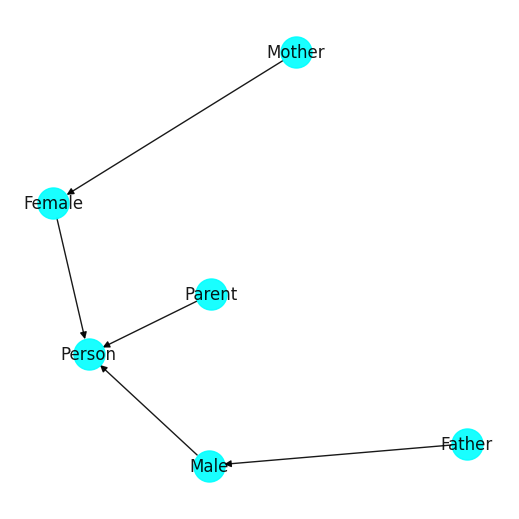

In [26]:
nx_network(edges)

In [ ]:
## DL2Vec projector

In [27]:
dl2vec_proj = DL2VecProjector(bidirectional_taxonomy=True)
d2v_edges = dl2vec_proj.project(ontology, with_individuals=True)

for edge in d2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Female	subclassof	Person
Person	superclassof	Female
Jane	hasChild	Melissa
Father	subclassof	Male
Male	superclassof	Father
Jane	hasChild	Robert
Male	subclassof	Person
Person	superclassof	Male
Parent	hasChild	Person
John	hasChild	Melissa
Parent	subclassof	Person
Person	superclassof	Parent
Mother	subclassof	Female
Female	superclassof	Mother
John	hasChild	Robert


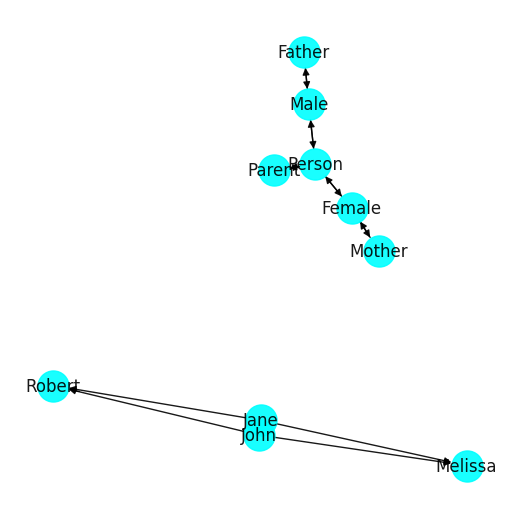

In [28]:
nx_network(d2v_edges)

## OWL2Vec* projector

In [33]:
owl2vec_proj = OWL2VecStarProjector(bidirectional_taxonomy=True)
o2v_edges = owl2vec_proj.project(ontology)
for edge in o2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Female	subclassof	Person
Person	superclassof	Female
Father	subclassof	Male
Male	superclassof	Father
Parent	subclassof	Person
Person	superclassof	Parent
Mother	subclassof	Female
Female	superclassof	Mother
Male	subclassof	Person
Person	superclassof	Male
Parent	hasChild	Person
Person	subclassof	Female
Female	superclassof	Person
Person	subclassof	Male
Male	superclassof	Person
Melissa	type	Female
John	type	Father
Jane	type	Mother
Robert	type	Male
John	hasChild	Melissa
Jane	hasChild	Melissa
Jane	hasChild	Robert
John	hasChild	Robert


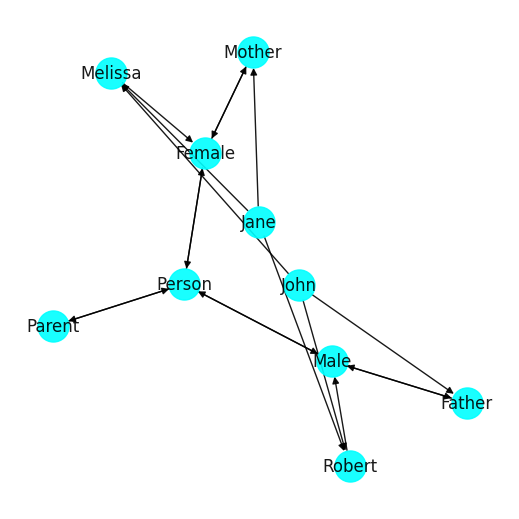

In [34]:
nx_network(o2v_edges)

# Random walk embeddings of a graph

After generating the graph, we can embed it in different ways. Two approaches are supported in mOWL:
- Embeddings based on random walks
- Embeddings based on KGE

Let's try the approach with random walks.

The method to generate the walks will be [DeepWalk]()

In [36]:
from mowl.walking.deepwalk.model import DeepWalk
walker =  DeepWalk(
             10, #num_walks,
             4, #walk_length,
             0.1, #alpha
             outfile = "walks_dw.txt", # /optional/path/to/save/walks,
             workers = 4)

# Using the Taxonomy projection edges
## Processing the walks using Word2Vec

In [37]:
walker.walk(edges)

In [38]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences, vector_size = 20)

In [40]:
similar_words = w2v_model.wv.most_similar("http://Father", topn=7)
for word, score in similar_words:
    print(f'{word}: {score}')

http://Female: -0.0067268190905451775
http://Mother: -0.04426427558064461
http://subclassof: -0.05909235030412674
*****: -0.06973978132009506
http://Parent: -0.1581422984600067
http://Person: -0.17466148734092712
http://Male: -0.27252569794654846


## Using the DL2Vec projection edges

In [41]:
from mowl.walking.node2vec.model import Node2Vec
walker =  Node2Vec(
             10, #num_walks,
             10, #walk_length,
             outfile = "walks_n2v.txt", # /optional/path/to/save/walks,
             workers = 4)
walker.walk(d2v_edges)

In [46]:
walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences, vector_size=2000)

In [47]:
similar_words = w2v_model.wv.most_similar("http://Father", topn=10)
for word, score in similar_words:
    print(f'{word}: {score}')

http://superclassof: 0.6108706593513489
http://subclassof: 0.5875197052955627
http://Person: 0.5207604169845581
http://Male: 0.5125958323478699
http://Female: 0.4809730052947998
http://Mother: 0.4305430054664612
http://hasChild: 0.41220754384994507
http://Parent: 0.39099663496017456
http://John: 0.18342487514019012
http://Melissa: 0.16905318200588226


## Using the OWL2Vec* projection edges (Task 🚧)

We will add a new axiom in the ontology:  $John \sqsubseteq \exists hasChild . Bob$. We know that John and Jane have two children. Can we infer that Bob is somehow to Jane?

In [48]:
Bob = adapter.create_individual("http://Bob")
axioms.add(adapter.create_object_property_assertion(has_child, John, Bob))
adapter.owl_manager.addAxioms(ontology, axioms)
ont_file = os.path.abspath(f'family2.owl')
adapter.owl_manager.saveOntology(ontology, IRI.create('file:///'+ont_file.replace("\\","/")))

In [49]:
from mowl.datasets import PathDataset

dataset = PathDataset("family2.owl")
projector = OWL2VecStarProjector(bidirectional_taxonomy=True) # TRUE OR FALSE for directed or undirected
new_edges = projector.project(dataset.ontology)

# If set to True, the projector will consider bidirectional edges in the taxonomy. This means that relationships between classes in your ontology will be treated as bidirectional, and the directionality of edges will be taken into account during the projection.
# If set to False, the projector will ignore the directionality of edges in the taxonomy. Relationships between classes will be treated as undirected, meaning that the direction of the relationship won't be considered during the projection.


In [50]:
walker =  DeepWalk(
             num_walks = 10, #"your number here", #number of walks,
             walk_length = 80, #"your number here", #walk length,
             alpha = 0.3, #"your number here", #alpha: restart parameter
             outfile = "walks_dw.txt", # /optional/path/to/save/walks,
             workers = 4)

walker.walk(new_edges)
walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)
w2v_model = Word2Vec(sentences, vector_size=5)

In [51]:
similar_words = w2v_model.wv.most_similar("http://Bob", topn=10)
for word, score in similar_words:
    print(f'{word}: {score}')

*****: 0.956266462802887
http://John: 0.9179092645645142
http://Male: 0.8337352871894836
http://hasChild: 0.826551079750061
http://Parent: 0.7838727831840515
http://superclassof: 0.7820922136306763
http://Person: 0.7782876491546631
http://Father: 0.7305381298065186
http://subclassof: 0.7262792587280273
http://Robert: 0.5664503574371338
